In [47]:
import requests
import json
import math
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from qgridnext import show_grid
from datetime import datetime, timedelta
import sys  
import os
import pandas_ta as ta


# Ensure the directories are in the system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Data_Management')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Universe_Selection')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Signal_Generation')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Risk_Management')))

# Import the modules
from data import Data
from calculations import Calculations
from coarse import Coarse_1 as Coarse
from fine import Fine_1 as Fine
from entry_signal import Trend_Following, Mean_Reversion
from tail_risk import Stop_Loss, Take_Profit

In [48]:
symbols = ['BTCUSDT', 'ETHUSDT']
start_time = dt.datetime(2024, 1, 1)
end_time = dt.datetime(2024, 2, 1)
timeframe = '1h'
data = Data(symbols, timeframe, start_time, end_time).df
#Perform coarse analysis and filtering
coarse = Coarse()
fine = Fine()
tf = Trend_Following()
mr = Mean_Reversion()
cal = Calculations()

df = coarse.volume_flag(data, 1000)
df = coarse.sort_by_volume(df)
df = coarse.sort_by_std(df, 2, 2)
df = fine.above_ema(df, 2)
#Generate a signal (just for the sake of applying the risk management)
str_length = 10
str_mult = 3
_df = tf.supertrend_signals(df, str_length, str_mult)
#Perform some calculations
_df = cal.trades(_df)
_df = cal.strategy_returns(_df)
_df = cal.sessions(_df)
_df

close  creturns      high  log_return  \
date                                                                    
2023-12-31 19:00:00 BTCUSDT  42475.23       NaN  42554.57         NaN   
                    ETHUSDT   2295.51       NaN   2297.18         NaN   
2023-12-31 20:00:00 BTCUSDT  42613.56  1.003257  42775.00    0.003251   
                    ETHUSDT   2303.72  1.003577   2306.60    0.003570   
2023-12-31 21:00:00 BTCUSDT  42581.10  1.002493  42638.41   -0.000762   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open   returns       volume  \
date                                                                     
2023-12-31 19:00:00 BTCUSDT  42261.02  42283.58       NaN   1271.68108   
                    ETHUSDT   2281.27   2281.87       NaN  10771.91830   
2023-12-31 20:00:00 BTCUSDT  42431.65  42475.23  0.003257   1196.37856   
                    ETHUSDT   2292.90   2295.52  0.003577   8413.42600   
2023-12-31 21:00:00 BTCUSDT  42500.00  42613.57 -0.000762    685.21980   
...                               ...       ...       ...          ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98 -0.003925  23011.28190   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  0.003976   1398.31850   
                    ETHUSDT   2269.03   2278.99  0.002962  10362.16650   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07 -0.001783   1257.92790   
                    ETHUSDT   2281.88   2285.75 -0.001142   9636.50420   

                             volume_in_dollars  volume_flag  ...  \
date                                                         ...   
2023-12-31 19:00:00 BTCUSDT       5.401495e+07            1  ...   
                    ETHUSDT       2.472705e+07            1  ...   
2023-12-31 20:00:00 BTCUSDT       5.098195e+07            1  ...   
                    ETHUSDT       1.938218e+07            1  ...   
2023-12-31 21:00:00 BTCUSDT       2.917741e+07            1  ...   
...                                        ...          ...  ...   
2024-01-31 16:00:00 ETHUSDT       5.244271e+07            1  ...   
2024-01-31 17:00:00 BTCUSDT       5.964677e+07            1  ...   
                    ETHUSDT       2.368532e+07            1  ...   
2024-01-31 18:00:00 BTCUSDT       5.356257e+07            1  ...   
                    ETHUSDT       2.200149e+07            1  ...   

                             SUPERT_10_3.0  SUPERTd_10_3.0  SUPERTl_10_3.0  \
date                                                                         
2023-12-31 19:00:00 BTCUSDT       0.000000               1             NaN   
                    ETHUSDT       0.000000               1             NaN   
2023-12-31 20:00:00 BTCUSDT            NaN               1             NaN   
                    ETHUSDT            NaN               1             NaN   
2023-12-31 21:00:00 BTCUSDT            NaN               1             NaN   
...                                    ...             ...             ...   
2024-01-31 16:00:00 ETHUSDT    2346.264505              -1             NaN   
2024-01-31 17:00:00 BTCUSDT   43680.887427              -1             NaN   
                    ETHUSDT    2345.623055              -1             NaN   
2024-01-31 18:00:00 BTCUSDT   43680.887427              -1             NaN   
                    ETHUSDT    2345.623055              -1             NaN   

                             SUPERTs_10_3.0  position  trades  strategy  \
date                                                                      
2023-12-31 19:00:00 BTCUSDT             NaN       0.0     0.0       N

In [49]:
for_testing = _df

In [50]:
_df['position'] 

date                        
2023-12-31 19:00:00  BTCUSDT    0.0
                     ETHUSDT    0.0
2023-12-31 20:00:00  BTCUSDT    1.0
                     ETHUSDT    1.0
2023-12-31 21:00:00  BTCUSDT    1.0
                               ... 
2024-01-31 16:00:00  ETHUSDT    1.0
2024-01-31 17:00:00  BTCUSDT    0.0
                     ETHUSDT    0.0
2024-01-31 18:00:00  BTCUSDT    0.0
                     ETHUSDT    0.0
Name: position, Length: 1488, dtype: float64

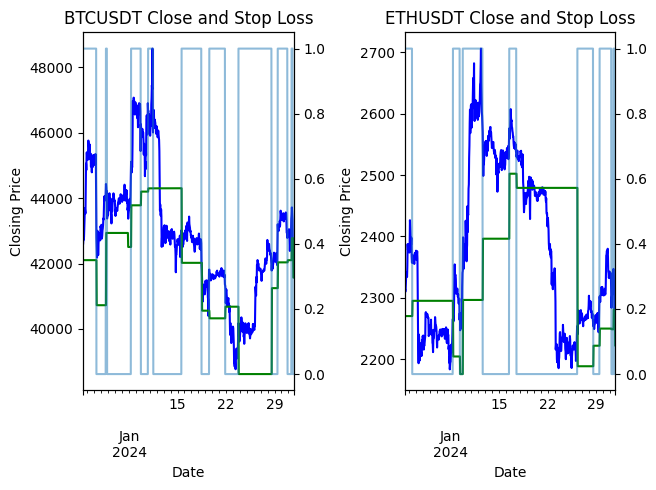

In [51]:
sl = Stop_Loss(_df, sl_type='atr', indicator_length=14, sl_mult=3)
_df = sl.apply_stop_loss(fixed = True, plot = True)

In [52]:
_df['position'].to_frame().head(50)

position
date                                 
2024-01-01 09:00:00 BTCUSDT       1.0
                    ETHUSDT       1.0
2024-01-01 10:00:00 BTCUSDT       1.0
                    ETHUSDT       1.0
2024-01-01 11:00:00 BTCUSDT       1.0
                    ETHUSDT       1.0
2024-01-01 12:00:00 BTCUSDT       1.0
                    ETHUSDT       1.0
2024-01-01 13:00:00 BTCUSDT       1.0
                    ETHUSDT       1.0
2024-01-01 14:00:00 BTCUSDT       1.0
                    ETHUSDT       1.0
2024-01-01 15:00:00 BTCUSDT       1.0
                    ETHUSDT       1.0
2024-01-01 16:00:00 BTCUSDT       1.0
                    ETHUSDT       1.0
2024-01-01 17:00:00 BTCUSDT       1.0
                    ETHUSDT       1.0
2024-01-01 18:00:00 BTCUSDT       1.0
                    ETHUSDT       1.0
2024-01-01 19:00:00 BTCUSDT       1.0
                    ETHUSDT       1.0
2024-01-01 20:00:00 BTCUSDT       1.0
                    ETHUSDT       1.0
2024-01-01 21:00:00 BTCUSDT       1.0
                    ETHUSDT       1.0
2024-01-01 22:00:00 BTCUSDT       1.0
                    ETHUSDT       1.0
2024-01-01 23:00:00 BTCUSDT       1.0
                    ETHUSDT       1.0
2024-01-02 00:00:00 BTCUSDT       1.0
                    ETHUSDT       1.0
2024-01-02 01:00:00 BTCUSDT       1.0
                    ETHUSDT       1.0
2024-01-02 02:00:00 BTCUSDT       1.0
                    ETHUSDT       1.0
2024-01-02 03:00:00 BTCUSDT       1.0
                    ETHUSDT       1.0
2024-01-02 04:00:00 BTCUSDT       1.0
                    ETHUSDT       1.0
2024-01-02 05:00:00 BTCUSDT       1.0
                    ETHUSDT       1.0
2024-01-02 06:00:00 BTCUSDT       1.0
                    ETHUSDT       1.0
2024-01-02 07:00:00 BTCUSDT       1.0
                    ETHUSDT       1.0
2024-01-02 08:00:00 BTCUSDT       1.0
                    ETHUSDT       1.0
2024-01-02 09:00:00 BTCUSDT       1.0
                    ETHUSDT       1.0

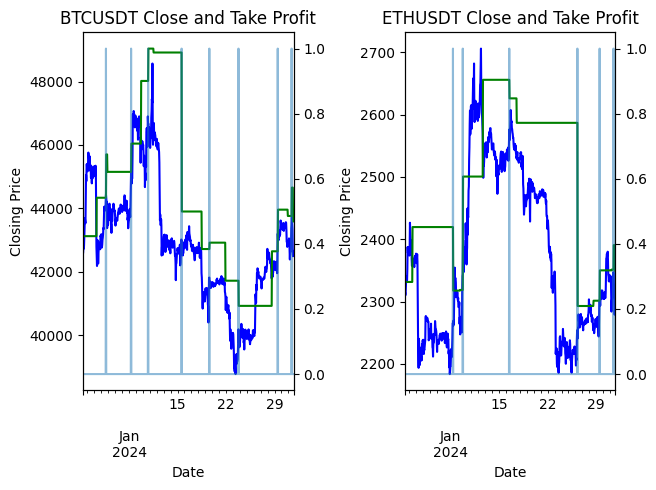

close  creturns      high  log_return  \
date                                                                    
2024-01-01 09:00:00 BTCUSDT  42612.24  1.003226  42715.55   -0.002421   
                    ETHUSDT   2300.99  1.002387   2305.11   -0.001377   
2024-01-01 10:00:00 BTCUSDT  42783.05  1.007247  42847.07    0.004000   
                    ETHUSDT   2314.70  1.008360   2318.34    0.005941   
2024-01-01 11:00:00 BTCUSDT  42725.15  1.005884  42856.00   -0.001354   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open   returns       volume  \
date                                                                     
2024-01-01 09:00:00 BTCUSDT  42580.00  42715.54 -0.002418    711.01152   
                    ETHUSDT   2294.84   2304.16 -0.001376   7316.25750   
2024-01-01 10:00:00 BTCUSDT  42586.51  42612.24  0.004008    942.70163   
                    ETHUSDT   2299.20   2300.99  0.005958  12303.53440   
2024-01-01 11:00:00 BTCUSDT  42664.42  42783.05 -0.001353    918.71056   
...                               ...       ...       ...          ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98 -0.003925  23011.28190   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  0.003976   1398.31850   
                    ETHUSDT   2269.03   2278.99  0.002962  10362.16650   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07 -0.001783   1257.92790   
                    ETHUSDT   2281.88   2285.75 -0.001142   9636.50420   

                             volume_in_dollars  volume_flag  ...  session  \
date                                                         ...            
2024-01-01 09:00:00 BTCUSDT       3.029779e+07            1  ...      0.0   
                    ETHUSDT       1.683464e+07            1  ...      0.0   
2024-01-01 10:00:00 BTCUSDT       4.033165e+07            1  ...      0.0   
                    ETHUSDT       2.847899e+07            1  ...      0.0   
2024-01-01 11:00:00 BTCUSDT       3.925205e+07            1  ...      0.0   
...                                        ...          ...  ...      ...   
2024-01-31 16:00:00 ETHUSDT       5.244271e+07            1  ...     12.0   
2024-01-31 17:00:00 BTCUSDT       5.964677e+07            1  ...     16.0   
                    ETHUSDT       2.368532e+07            1  ...     12.0   
2024-01-31 18:00:00 BTCUSDT       5.356257e+07            1  ...     16.0   
                    ETHUSDT       2.200149e+07            1  ...     12.0   

                             session_compound  overall_session_return  \
date                                                                    
2024-01-01 09:00:00 BTCUSDT               1.0                0.007216   
                    ETHUSDT               1.0                0.000124   
2024-01-01 10:00:00 BTCUSDT               1.0                0.007216   
                    ETHUSDT               1.0                0.000124   
2024-01-01 11:00:00 BTCUSDT               1.0                0.007216   
...                                       ...                     ...   
2024-01-31 16:00:00 ETHUSDT               1.0                0.000000   
2024-01-31 17:00:00 BTCUSDT               1.0                0.000000   
                    ETHUSDT               1.0                0.000000   
2024-01-31 18:00:00 BTCUSDT               1.0                0.000000   
                    ETHUSDT               1.0                0.000000   

                                    atr     stop_loss  session_stop_loss  \
date                                                                       
2024-01-01 09:0

In [53]:
tp = Take_Profit(_df, 'rr', 1)
_df = tp.apply_take_profit(fixed = True, plot = True)
_df

---

## Position Sizing

- Factors: Volatility (ATR)
- Method: Equal Volatility weighting
- Method of Updating: Scaling-out (partial take profits)

Steps:

Write a function:\
Input: df, maximum risk percentage per trade, maximum dollar allocation per trade\
Output: Actual allocation per trade

- Make a function that calculates the actual allocation allocation per trade
- Make 2 columns: one for the position size at any time, and another for the current size of the trade for each trading session accounting for cumualtive returns. 
-> Note that we don't need to calculate the position size at the beginning of each session as this formula applies applies whenever we "can" enter a trade. 

For the position sizing function:
1. Make sure that the required indicator (in this case it is the atr) is there
2. Calculate the distance from the entry (in this case it is the close) to the atr value (as we are looking normalize positions using volatility)
3. Normalize the distance relative to the close, to get the percent distance
4. Calculates the max_dollar_risk from the given inputs
3. Apply the formula: max_dollar_risk / percent distance = actual allocation

For the first column:
1. Ensure that there is the required indicator (ATR) otherwise calculate it
2. Apply the function to each row

For the 2nd column:
1. Apply the function for each session
2. multiply cumulative return * current position size * position size at the first of the sesion

#### Make Position sizing function

In [33]:
#Check if there is the atr indicator
indicator_length = 14
_df = _df.unstack()
if not any('atr' in col for col in _df.columns.get_level_values(0)):
    for coin in _df.columns.get_level_values(1):
        #Calculate the atr indicator
        high, low, close = _df['high', coin], _df['low', coin], _df['close', coin]
        _df['atr', coin] = ta.atr(high, low, close, length=indicator_length)
    
    #Remove Warm up
    _df = _df.iloc[indicator_length:]

#Inputs
max_percent_risk = 0.01
max_dollar_allocation = 1000 

#distance to session stop loss, to apply it for all types of stop losses (normalized)
_df['distance_to_atr'] = (_df['close'] - _df['session_stop_loss']) / _df['close']
_df['distance_to_atr']

KeyError: 'session_stop_loss'

In [ ]:
max_dollar_risk_per_trade = max_percent_risk * max_dollar_allocation
_df['actual_allocation'] = max_dollar_risk_per_trade / _df['distance_to_atr']
_df['actual_allocation'] = _df['actual_allocation'].clip(upper = max_dollar_allocation, lower = 0)
print(_df['actual_allocation'].max()) #Since we are not gonna use any leverage, we can't allocate more than the max_dollar_allocation
print(_df['actual_allocation'].min()) #We can't allocate less than 0
print(_df['actual_allocation'])


1000.0
0.0
date                        
2024-01-01 09:00:00  BTCUSDT     836.904839
                     ETHUSDT     753.817493
2024-01-01 10:00:00  BTCUSDT     629.185911
                     ETHUSDT     523.279373
2024-01-01 11:00:00  BTCUSDT     686.817035
                                   ...     
2024-01-31 16:00:00  ETHUSDT       0.000000
2024-01-31 17:00:00  BTCUSDT     392.343117
                     ETHUSDT    1000.000000
2024-01-31 18:00:00  BTCUSDT     421.107426
                     ETHUSDT     378.313115
Name: actual_allocation, Length: 1460, dtype: float64


In [ ]:
def actual_allocation(df, max_percent_risk, max_dollar_allocation):
    #distance to session stop loss, to apply it for all types of stop losses (normalized)
    df['distance_to_atr'] = (df['close'] - df['session_stop_loss']) / df['close']

    #Calcualte the max dollar risk per trade
    max_dollar_risk_per_trade = max_percent_risk * max_dollar_allocation


    df['actual_allocation'] = max_dollar_risk_per_trade / df['distance_to_atr']
    df['actual_allocation'] = df['actual_allocation'].clip(upper = max_dollar_allocation, lower = 0)
    #Since we are not gonna use any leverage, we can't allocate more than the max_dollar_allocation
    #we can't allocate less than 0
    return df

#### Position size at any time point

In [ ]:
#We simple apply the function to the dataframe
_df = actual_allocation(_df, 0.01, 1000)
test = _df
_df

close  creturns      high  log_return  \
date                                                                    
2024-01-01 09:00:00 BTCUSDT  42612.24  1.003226  42715.55   -0.002421   
                    ETHUSDT   2300.99  1.002387   2305.11   -0.001377   
2024-01-01 10:00:00 BTCUSDT  42783.05  1.007247  42847.07    0.004000   
                    ETHUSDT   2314.70  1.008360   2318.34    0.005941   
2024-01-01 11:00:00 BTCUSDT  42725.15  1.005884  42856.00   -0.001354   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open   returns       volume  \
date                                                                     
2024-01-01 09:00:00 BTCUSDT  42580.00  42715.54 -0.002418    711.01152   
                    ETHUSDT   2294.84   2304.16 -0.001376   7316.25750   
2024-01-01 10:00:00 BTCUSDT  42586.51  42612.24  0.004008    942.70163   
                    ETHUSDT   2299.20   2300.99  0.005958  12303.53440   
2024-01-01 11:00:00 BTCUSDT  42664.42  42783.05 -0.001353    918.71056   
...                               ...       ...       ...          ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98 -0.003925  23011.28190   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  0.003976   1398.31850   
                    ETHUSDT   2269.03   2278.99  0.002962  10362.16650   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07 -0.001783   1257.92790   
                    ETHUSDT   2281.88   2285.75 -0.001142   9636.50420   

                             volume_in_dollars  volume_flag  ...  \
date                                                         ...   
2024-01-01 09:00:00 BTCUSDT       3.029779e+07            1  ...   
                    ETHUSDT       1.683464e+07            1  ...   
2024-01-01 10:00:00 BTCUSDT       4.033165e+07            1  ...   
                    ETHUSDT       2.847899e+07            1  ...   
2024-01-01 11:00:00 BTCUSDT       3.925205e+07            1  ...   
...                                        ...          ...  ...   
2024-01-31 16:00:00 ETHUSDT       5.244271e+07            1  ...   
2024-01-31 17:00:00 BTCUSDT       5.964677e+07            1  ...   
                    ETHUSDT       2.368532e+07            1  ...   
2024-01-31 18:00:00 BTCUSDT       5.356257e+07            1  ...   
                    ETHUSDT       2.200149e+07            1  ...   

                             overall_session_return         atr     stop_loss  \
date                                                                            
2024-01-01 09:00:00 BTCUSDT                0.007216  169.721566  42103.075302   
                    ETHUSDT                0.000124   10.174832   2270.465503   
2024-01-01 10:00:00 BTCUSDT                0.007216  179.391771  42244.874687   
                    ETHUSDT                0.000124   11.129219   2281.312342   
2024-01-01 11:00:00 BTCUSDT                0.007216  180.645360  42183.213919   
...                                             ...         ...           ...   
2024-01-31 16:00:00 ETHUSDT                0.000000   21.293798   2215.118607   
2024-01-31 17:00:00 BTCUSDT                0.000000  362.404471  41568.856586   
                    ETHUSDT                0.000000   21.123526   2222.379421   
2024-01-31 18:00:00 BTCUSDT                0.000000  346.048438  41541.854687   
                    ETHUSDT                0.000000   20.116846   2222.789462   

                             session_stop_loss  trade  cstrategy  \
date                                                               
2024-01-01 09:00:00 BTCUSDT       42103.0753

#### Position Size during a trade

In [ ]:
test = test.unstack()

In [ ]:
test

close           creturns                high           \
                      BTCUSDT  ETHUSDT   BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT   
date                                                                            
2024-01-01 09:00:00  42612.24  2300.99  1.003226  1.002387  42715.55  2305.11   
2024-01-01 10:00:00  42783.05  2314.70  1.007247  1.008360  42847.07  2318.34   
2024-01-01 11:00:00  42725.15  2309.89  1.005884  1.006264  42856.00  2319.55   
2024-01-01 12:00:00  42812.70  2313.76  1.007945  1.007950  42824.90  2317.09   
2024-01-01 13:00:00  43111.10  2326.90  1.014970  1.013675  43208.86  2331.77   
...                       ...      ...       ...       ...       ...      ...   
2024-01-31 14:00:00  43334.64  2323.38  1.020233  1.012141  43551.99  2342.26   
2024-01-31 15:00:00  42541.18  2287.98  1.001553  0.996720  43361.10  2324.67   
2024-01-31 16:00:00  42487.12  2279.00  1.000280  0.992808  42707.68  2292.37   
2024-01-31 17:00:00  42656.07  2285.75  1.004258  0.995748  42690.42  2287.94   
2024-01-31 18:00:00  42580.00  2283.14  1.002467  0.994611  42688.88  2288.91   

                    log_return                 low           ... cstrategy  \
                       BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT  ...   BTCUSDT   
date                                                         ...             
2024-01-01 09:00:00  -0.002421 -0.001377  42580.00  2294.84  ...  1.000000   
2024-01-01 10:00:00   0.004000  0.005941  42586.51  2299.20  ...  1.000000   
2024-01-01 11:00:00  -0.001354 -0.002080  42664.42  2306.53  ...  1.000000   
2024-01-01 12:00:00   0.002047  0.001674  42704.42  2306.48  ...  1.000000   
2024-01-01 13:00:00   0.006946  0.005663  42812.70  2313.76  ...  1.000000   
...                        ...       ...       ...      ...  ...       ...   
2024-01-31 14:00:00  -0.004116 -0.005259  43041.10  2309.51  ...  1.035538   
2024-01-31 15:00:00  -0.018480 -0.015354  42519.92  2286.11  ...  1.035538   
2024-01-31 16:00:00  -0.001272 -0.003933  42276.84  2263.57  ...  1.035538   
2024-01-31 17:00:00   0.003969  0.002957  42381.10  2269.03  ...  1.035538   
2024-01-31 18:00:00  -0.001785 -0.001143  42555.46  2281.88  ...  1.035538   

                                take_profit              session_take_profit  \
                      ETHUSDT       BTCUSDT      ETHUSDT             BTCUSDT   
date                                                                           
2024-01-01 09:00:00  1.000000  43121.404698  2331.514497        43121.404698   
2024-01-01 10:00:00  1.000000  43321.225313  2348.087658        43121.404698   
2024-01-01 11:00:00  1.000000  43267.086081  2343.861072        43121.404698   
2024-01-01 12:00:00  1.000000  43336.637212  2347.517567        43121.404698   
2024-01-01 13:00:00  1.000000  43699.481530  2362.623495        43121.404698   
...                       ...           ...          ...                 ...   
2024-01-31 14:00:00  1.007089  44308.566512  2381.411438        44655.063647   
2024-01-31 15:00:00  1.007089  43625.793190  2350.129193        44655.063647   
2024-01-31 16:00:00  1.007089  43586.583676  2342.881393        43586.583676   
2024-01-31 17:00:00  1.007089  43743.283414  2349.120579        43586.583676   
2024-01-31 18:00:00  1.007089  43618.145313  2343.490538        43586.583676   

                                 distance_to_atr           actual_allocation  \
                         ETHUSDT         BTCUSDT   ETHUSDT           BTCUSDT   
date                                                                           
2024-01-01 09:00:00  2331.514497        0.011949  0.013266        836.904839   
2024-01-01 10:00:00  2331.514497        0.015894  0.019110        629.185911   
2024-01-01 11:00:00  2331.514497        0.014560  0.017068        686.817035   
2024-01-01 12:00:00  2331.514497        0.016575  0.018712        603.314683   
2024-01-01 13:00:00  2331.514497        0.023382  0.024253        427.679005   
...                          ...   

In [ ]:
#We can also apply the function to the dataframe using the apply method
def current_trade_size(group, coin):
    """
    It assumes that the actual_allocation column is already calculated
    """
    allocation_for_trade = group['actual_allocation', coin].iloc[0]

    #Calculate the current allocation
    group['current_allocation', coin] = group['position', coin] *group['session_compound', coin] * allocation_for_trade

    #The reason why we are doing the above, is because position can be any number between 0 and 1 if we have taken partials during the trade
    # depending on the strategy used. So we need to multiply the position by the actual allocation to get the current allocation.
    # We also multiply by the session compound to account for the how well the trade is doing.
    return group

for coin in test.columns.get_level_values(1):
    test = test.groupby(test['session', coin], group_keys=False).apply(lambda group: current_trade_size(group, coin))

test['current_allocation']

,BTCUSDT,ETHUSDT
date,,
2024-01-01 09:00:00,0.0,0.0
2024-01-01 10:00:00,0.0,0.0
2024-01-01 11:00:00,0.0,0.0
2024-01-01 12:00:00,0.0,0.0
2024-01-01 13:00:00,0.0,0.0
...,...,...
2024-01-31 14:00:00,0.0,0.0
2024-01-31 15:00:00,0.0,0.0
2024-01-31 16:00:00,0.0,0.0


In [ ]:
test['current_allocation'].head(50)

,BTCUSDT,ETHUSDT
date,,
2024-01-01 09:00:00,0.0,0.0
2024-01-01 10:00:00,0.0,0.0
2024-01-01 11:00:00,0.0,0.0
2024-01-01 12:00:00,0.0,0.0
2024-01-01 13:00:00,0.0,0.0
2024-01-01 14:00:00,0.0,0.0
2024-01-01 15:00:00,0.0,0.0
2024-01-01 16:00:00,0.0,0.0
2024-01-01 17:00:00,0.0,0.0
